## Packages
- install.packages('neuralnet')
- install.packages('caret')
- install.packages('data.table')
- install.packages('mltools')
- install.packages('NeuralNetTools')

In [107]:
library(mltools)
library(data.table)
library(neuralnet)
library(caret)
library(NeuralNetTools)

dim(iris)
head(iris)
summary(iris)

[1] 150   5

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## Dimensionamento de Caracteristicas - Padronização

In [108]:
# Matriz com dados padronizados
data_ = scale(iris[, 1:4])
head(data_)

# Coerção para data frame
data_ = as.data.frame(data_)
head(data_)

# Adicionando classe = Species
data_$Species = iris$Species
head(data_)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8976739,1.01560199,-1.335752,-1.311052
2,-1.1392005,-0.13153881,-1.335752,-1.311052
3,-1.3807271,0.32731751,-1.392399,-1.311052
4,-1.5014904,0.09788935,-1.279104,-1.311052
5,-1.0184372,1.24503015,-1.335752,-1.311052
6,-0.5353840,1.93331463,-1.165809,-1.048667


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.8976739,1.01560199,-1.335752,-1.311052,setosa
2,-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
3,-1.3807271,0.32731751,-1.392399,-1.311052,setosa
4,-1.5014904,0.09788935,-1.279104,-1.311052,setosa
5,-1.0184372,1.24503015,-1.335752,-1.311052,setosa
6,-0.5353840,1.93331463,-1.165809,-1.048667,setosa


## Dados - Treino e Teste
- createDataPartition( ) -> Retorna uma amostra dos dados
- dim( )[1] -> Obtemos apenas a quantidade de instâncias (linhas)
- p= -> Probabilidade

In [109]:
# Amostra
set.seed(1234)
particao = createDataPartition(1:dim(data_)[1], p=0.7)
summary(particao)

# Dados
datatreino = data_[particao$Resample1, ]
datateste = data_[- particao$Resample1, ]

dim(datatreino)
dim(datateste)

          Length Class  Mode   
Resample1 106    -none- numeric

[1] 106   5

[1] 44  5

## One hot enconding - Classe
- cbind( ) -> Utilizamos para manter os atributos na variavel
- one_hot( ) -> Retorna a classe decodificada (table -> Como tabela)

In [110]:
datatreino = cbind(datatreino[, 1:4], one_hot(as.data.table(datatreino[, 5])))
head(datatreino)
summary(datatreino)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,V1_setosa,V1_versicolor,V1_virginica
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2,-1.139200,-0.13153881,-1.335752,-1.311052,1,0,0
3,-1.380727,0.32731751,-1.392399,-1.311052,1,0,0
4,-1.501490,0.09788935,-1.279104,-1.311052,1,0,0
5,-1.018437,1.24503015,-1.335752,-1.311052,1,0,0
6,-0.535384,1.93331463,-1.165809,-1.048667,1,0,0
7,-1.501490,0.78617383,-1.335752,-1.179859,1,0,0


  Sepal.Length       Sepal.Width        Petal.Length       Petal.Width      
 Min.   :-1.86378   Min.   :-2.42582   Min.   :-1.56234   Min.   :-1.44224  
 1st Qu.:-0.77691   1st Qu.:-0.59040   1st Qu.:-1.22246   1st Qu.:-1.14706  
 Median :-0.05233   Median :-0.13154   Median : 0.27871   Median : 0.13207  
 Mean   : 0.00919   Mean   :-0.01899   Mean   : 0.01043   Mean   : 0.02563  
 3rd Qu.: 0.67225   3rd Qu.: 0.55675   3rd Qu.: 0.76021   3rd Qu.: 0.78803  
 Max.   : 2.48370   Max.   : 3.08046   Max.   : 1.66657   Max.   : 1.70638  
   V1_setosa      V1_versicolor     V1_virginica   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3113   Mean   :0.3774   Mean   :0.3113  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

## Modelo Neural
- neuralnet( ) -> Retonra modelo neural
- ~ -> Separa váriaveis dependentes de independentes
- hidden= -> Indica camadas ocultas, abaixo temos duas, com 5 e 4 neuronios respectivamente
- 
- rep= -> Indica a repetição de aprendizagem ('best' = a melhor | Menos taxa de erro)
- plot( ) - Precisa do argumento rep=

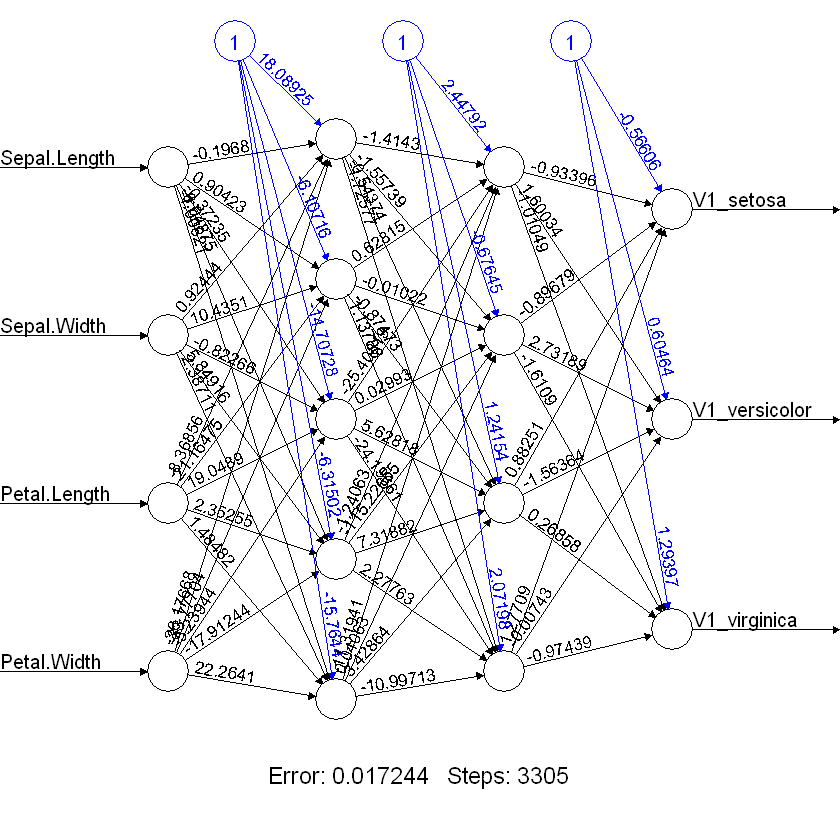

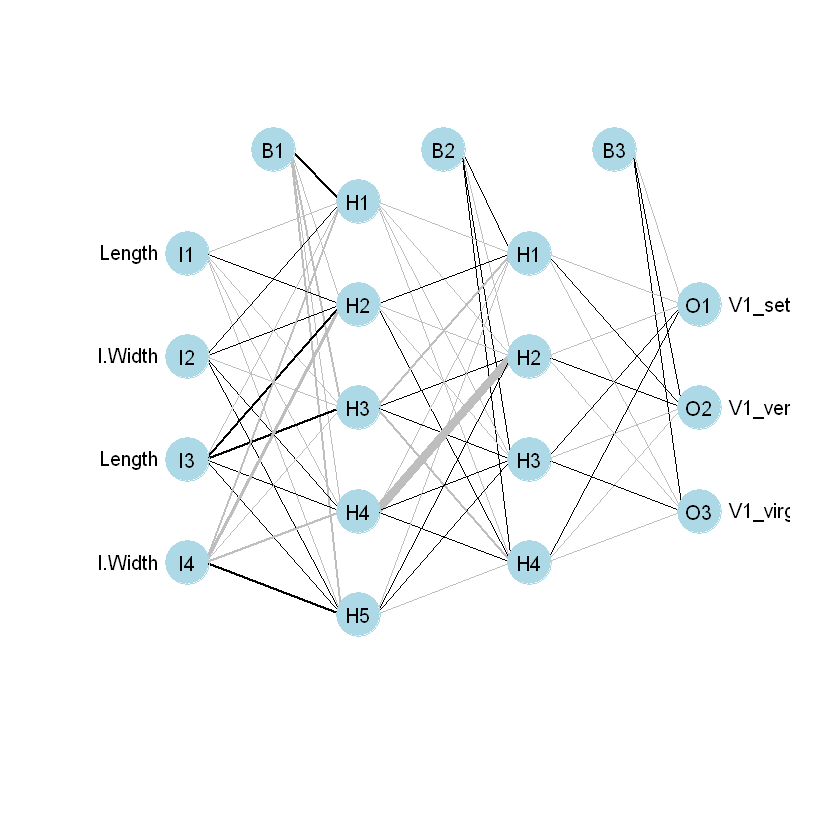

In [111]:
modelo = neuralnet(formula = V1_setosa + V1_versicolor + V1_virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
data=datatreino, hidden = c(5, 4))

plot(modelo, rep='best')
plotnet(modelo)

## Previsões
- compute( ) -> Retorna previsão para objetos da classe nn = neuralnet
- O resultado é demonstrado em pesos que tendem para as classes previstas ($net.result)

In [112]:
predicao = compute(modelo, datateste[, 1:4])
summary(predicao)
head(predicao$net.result)

# Coerção para data frame
predicao_result = as.data.frame(predicao$net.result)
summary(predicao_result)
head(predicao_result)

           Length Class  Mode   
neurons      3    -none- list   
net.result 132    -none- numeric

1,0.9999490,0.001184915,-3.122372e-06
10,0.9999490,0.001184888,-3.099547e-06
12,0.9999490,0.001184916,-3.123149e-06
13,0.9999497,0.001183223,-1.868730e-06
17,0.9999490,0.001184914,-3.122079e-06
19,0.9999490,0.001184914,-3.122419e-06


       V1                  V2                  V3            
 Min.   :-0.023714   Min.   :-0.602367   Min.   :-0.5743453  
 1st Qu.:-0.002483   1st Qu.: 0.001169   1st Qu.:-0.0000031  
 Median : 0.002828   Median : 0.001185   Median : 0.0063220  
 Mean   : 0.390640   Mean   : 0.215219   Mean   : 0.3952548  
 3rd Qu.: 0.999949   3rd Qu.: 0.037439   3rd Qu.: 0.9974884  
 Max.   : 1.000290   Max.   : 1.520467   Max.   : 1.3533960  

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,0.9999490,0.001184915,-3.122372e-06
10,0.9999490,0.001184888,-3.099547e-06
12,0.9999490,0.001184916,-3.123149e-06
13,0.9999497,0.001183223,-1.868730e-06
17,0.9999490,0.001184914,-3.122079e-06
19,0.9999490,0.001184914,-3.122419e-06


## Avaliando Performance
- names( ) -> Nomeia um elemento
- colnames( ) -> Retorna nome de colunas
- max.col( ) -> Retorna o maior valor entre as colunas
- ties.method='first' -> Retorna o primeiro elemento encontrado

In [113]:
# Alteramos os nomes das colunas
names(predicao_result)[1] = 'setosa'
names(predicao_result)[2] = 'versicolor'
names(predicao_result)[3] = 'virginica'
head(predicao_result)

# Criamos a co9luna classe e atribuimos seu valor
# de acordo com o maior peso das previsões

predicao_result$class = colnames(predicao_result[, 1:3])[max.col(predicao_result[, 1:3],
ties.method = 'first')]
summary(predicao_result)
head(predicao_result)

,setosa,versicolor,virginica
,<dbl>,<dbl>,<dbl>
1,0.9999490,0.001184915,-3.122372e-06
10,0.9999490,0.001184888,-3.099547e-06
12,0.9999490,0.001184916,-3.123149e-06
13,0.9999497,0.001183223,-1.868730e-06
17,0.9999490,0.001184914,-3.122079e-06
19,0.9999490,0.001184914,-3.122419e-06


     setosa            versicolor          virginica         
 Min.   :-0.023714   Min.   :-0.602367   Min.   :-0.5743453  
 1st Qu.:-0.002483   1st Qu.: 0.001169   1st Qu.:-0.0000031  
 Median : 0.002828   Median : 0.001185   Median : 0.0063220  
 Mean   : 0.390640   Mean   : 0.215219   Mean   : 0.3952548  
 3rd Qu.: 0.999949   3rd Qu.: 0.037439   3rd Qu.: 0.9974884  
 Max.   : 1.000290   Max.   : 1.520467   Max.   : 1.3533960  
    class          
 Length:44         
 Class :character  
 Mode  :character  
                   
                   
                   

,setosa,versicolor,virginica,class
,<dbl>,<dbl>,<dbl>,<chr>
1,0.9999490,0.001184915,-3.122372e-06,setosa
10,0.9999490,0.001184888,-3.099547e-06,setosa
12,0.9999490,0.001184916,-3.123149e-06,setosa
13,0.9999497,0.001183223,-1.868730e-06,setosa
17,0.9999490,0.001184914,-3.122079e-06,setosa
19,0.9999490,0.001184914,-3.122419e-06,setosa


## Matriz de Confusão
- \* 100 -> Retorna porcentagem absoluta da taxa de acerto

In [122]:
confusao = table(predicao_result$class, datateste$Species)
confusao

taxaacerto = sum(diag(confusao)) * 100 / sum(confusao)
taxaacerto

            
             setosa versicolor virginica
  setosa         17          0         0
  versicolor      0          8         1
  virginica       0          2        16

[1] 93.18182